Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [2]:
#Imoporting neccecory Libraries:

#common lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing lib:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#outliers lib:
from scipy import stats

#multicolliniarity lib:
from sklearn.feature_selection import SelectKBest,f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score

#Model building lib 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

#model evaluation lib:
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,confusion_matrix,plot_roc_curve

#model hyper parameter tuning lib:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [188]:
#importing the Dataframe
df=pd.read_csv('Insurance Claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [149]:
#display the full rows from the data frame
pd.set_option('display.max_rows',None)

In [150]:
df.shape
#there is 1000 rows and 40 columns is availble in the data

(1000, 40)

In [82]:
df.info()
#here the data types are int and object abd float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [83]:
#checking null value from the dataframe
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [189]:
#here the _c39 is unwanted column with all null values.drop the column from the data frame.
df=df.drop(columns='_c39')

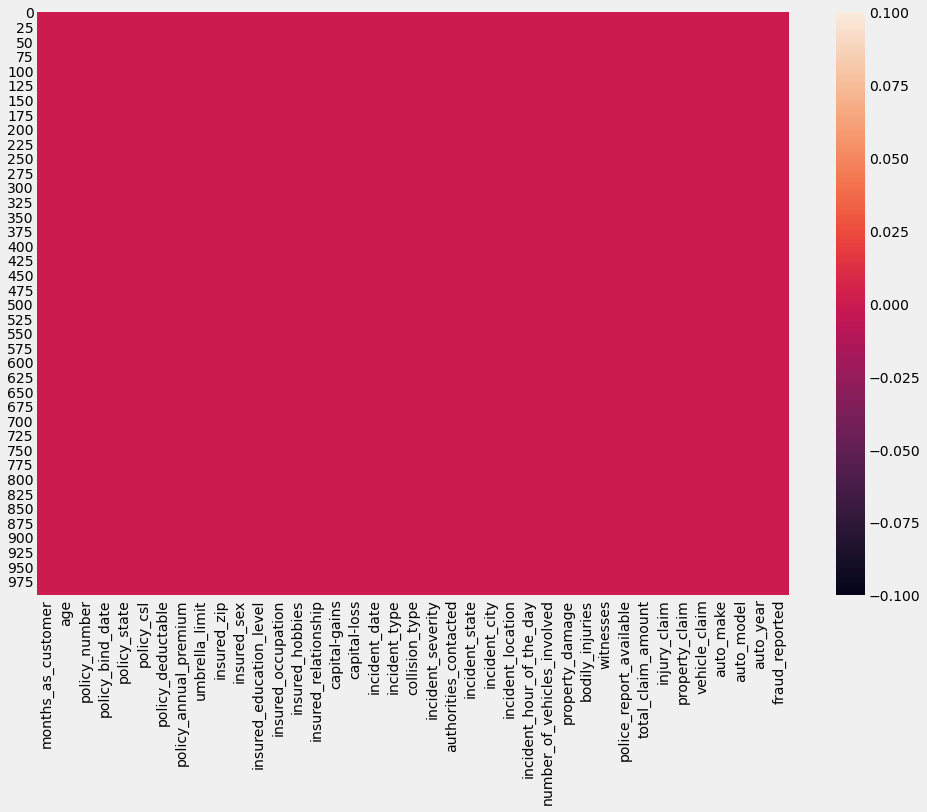

In [85]:
#after deleting the _c39 columns in the dataframe,cross checking with the heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df.isna())
plt.show()

In [86]:
#checking the unique values from the dataframe
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [87]:
#discribe the dataframe
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [88]:
#the data not looks normal as the many of the columns having very much difference between mean and median(50%)
#umbrella_limit having the values in e raise to the power value.
#unwanted columns:insured_hobbies
#the quntiles are also not looks normal.

In [89]:
#checking froud value count
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

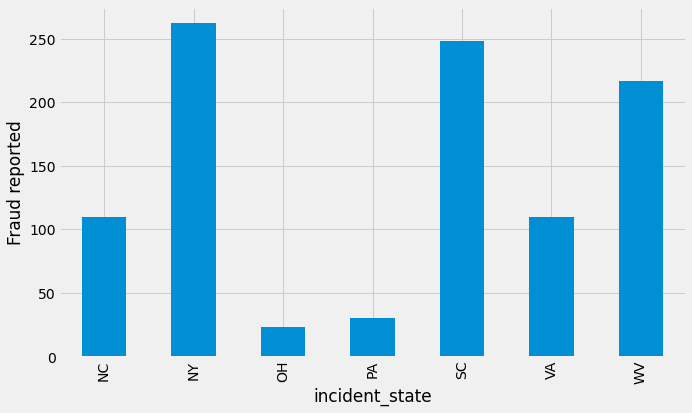

In [51]:
#plotting fruad value count
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

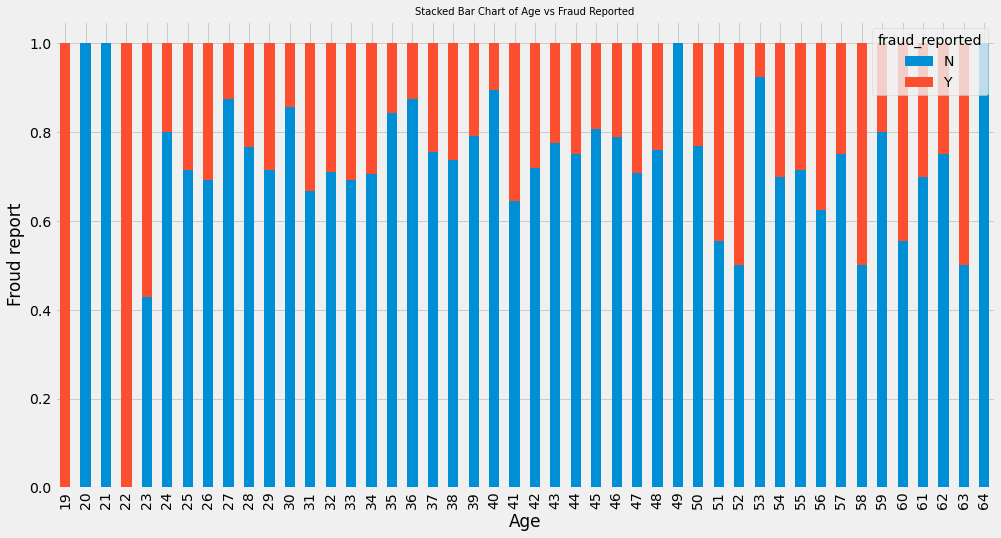

In [53]:
#plotting the graph for age vs froud report
plt.rcParams['figure.figsize'] = [15, 8]
ax=plt.style.use('fivethirtyeight')
table=pd.crosstab(df.age,df.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported',fontsize=10)
plt.xlabel('Age')
plt.ylabel('Froud report')
plt.show()

In [ ]:
#from the graph it is visible that the froud max is reported on age of 19 to 23.

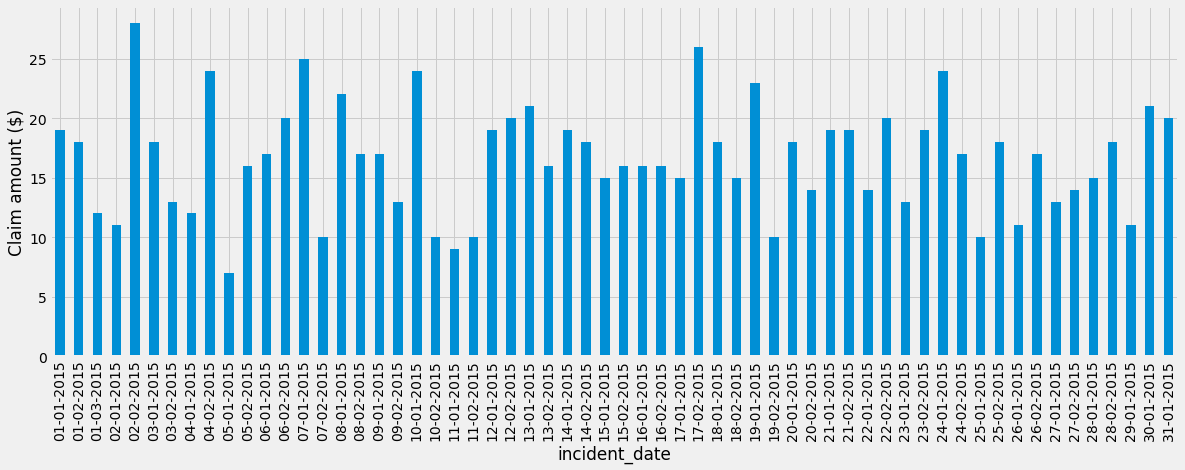

In [55]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(18,6))
ax=df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

In [ ]:
#As per the graph all the incident claim has been made in the month of jan and feb.

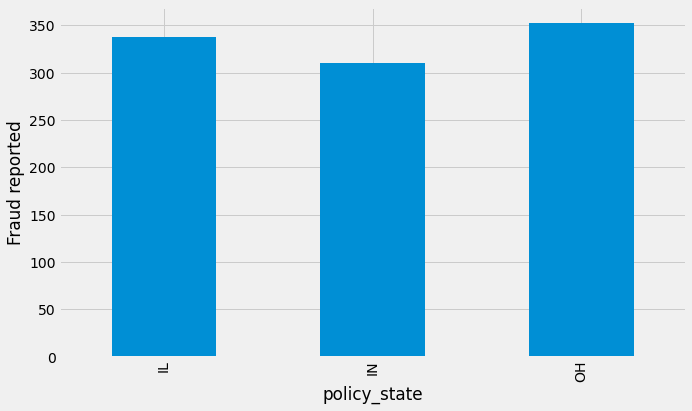

In [56]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,6))
ax=df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

In [90]:
#Saving catagorial data into list for the binary encoding
#dt_value=['int8','int16','int32','int64','float16','float32','float64']
#cat_data=[]
#feature_type=df.columns.values.tolist()


#for column in feature_type:
#    if df[column].dtype in dt_value:
#        continue
#    cat_data.append(column)        

In [91]:
#delete columns:incident_location,insured_hobbies
#date:incident_date,policy_bind_date
#get dummies:policy_state,policy_csl,insured_education_level,insured_occupation,insured_relationship,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model
#label encoder:insured_sex,fraud_reported
#replace columns(?):collision_type,property_damage,police_report_available
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [190]:
#Using the label encoder to encode the data:
lb=LabelEncoder()

lb_data=['insured_sex','fraud_reported']

for i in lb_data:
    df[i]=lb.fit_transform(df[i])

In [93]:
df['insured_zip'].value_counts()

446895    2
456602    2
477695    2
469429    2
431202    2
453277    1
443625    1
469653    1
471704    1
453274    1
619166    1
453265    1
477856    1
608929    1
459428    1
459429    1
479913    1
432786    1
469646    1
459407    1
610989    1
432781    1
619148    1
438923    1
606858    1
620819    1
459889    1
604804    1
440961    1
470128    1
600702    1
476315    1
455340    1
477268    1
600754    1
468300    1
475891    1
477938    1
615226    1
430832    1
469742    1
436973    1
444903    1
459984    1
471786    1
471785    1
471784    1
446657    1
465631    1
602842    1
437422    1
608982    1
447188    1
453620    1
613471    1
451280    1
459504    1
604874    1
475847    1
467654    1
449221    1
608963    1
445120    1
604861    1
430714    1
600904    1
469621    1
457463    1
473645    1
612908    1
612904    1
608807    1
473638    1
614948    1
600208    1
459298    1
614945    1
465440    1
459295    1
430621    1
453148    1
455332    1
455482    1
4444

In [60]:
#df.describe(include='all')

In [94]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [95]:
df['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [97]:
df['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In [ ]:
#the unwanted columns are:
##policy_number,insured_zip,policy_bind_date,incident_date,incident_location
#auto_year,incident_hour_of_the_day

In [191]:
#dropping the unwanted columns from the dataframe:
df=df.drop(columns=['incident_location','policy_number','insured_zip','policy_bind_date','incident_date','incident_location'])

In [99]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,1,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,IN,250/500,2000,1197.22,5000000,1,MD,machine-op-inspct,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,OH,100/300,2000,1413.14,5000000,0,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,IL,250/500,2000,1415.74,6000000,0,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,IL,500/1000,1000,1583.91,6000000,1,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [100]:
#identifying the variable with '?' value:
values={}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j=np.sum(df[i] == '?')
        values[i]=j
values=pd.DataFrame.from_dict(values,orient='index')
print(values)

                           0
policy_state               0
policy_csl                 0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0


In [ ]:
#here we can see that there is 3 columns with value ?
#collision_type,property_damage,police_report_available

In [101]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [192]:
#replacing the the '?' value with the 'NA' value
df['collision_type']=df['collision_type'].replace('?','NA')
df['property_damage']=df['property_damage'].replace('?','NA')
df['police_report_available']=df['police_report_available'].replace('?','NA')

In [103]:
#the '?' has been replaced
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
NA                 178
Name: collision_type, dtype: int64

In [104]:
#getting the numerical data columns
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [105]:
#getting the details of object data type details:
df.select_dtypes(include=['object']).columns

Index(['policy_state', 'policy_csl', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [193]:
#using the get_dummies to encode the data:
df=pd.get_dummies(df,columns=['policy_state','policy_csl','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type',
                              'incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model'])

In [107]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,1,53300,0,5,1,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,1,0,0,8,1,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,0,35100,0,7,3,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,0,48900,-62400,5,1,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,1583.91,6000000,1,66000,-46000,20,1,...,0,0,1,0,0,0,0,0,0,0


In [111]:
df.iloc[:,:18].head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,1000,1406.91,0,1,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1
1,228,42,2000,1197.22,5000000,1,0,0,8,1,0,0,5070,780,780,3510,2007,1
2,134,29,2000,1413.14,5000000,0,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0
3,256,41,2000,1415.74,6000000,0,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1
4,228,44,1000,1583.91,6000000,1,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,0


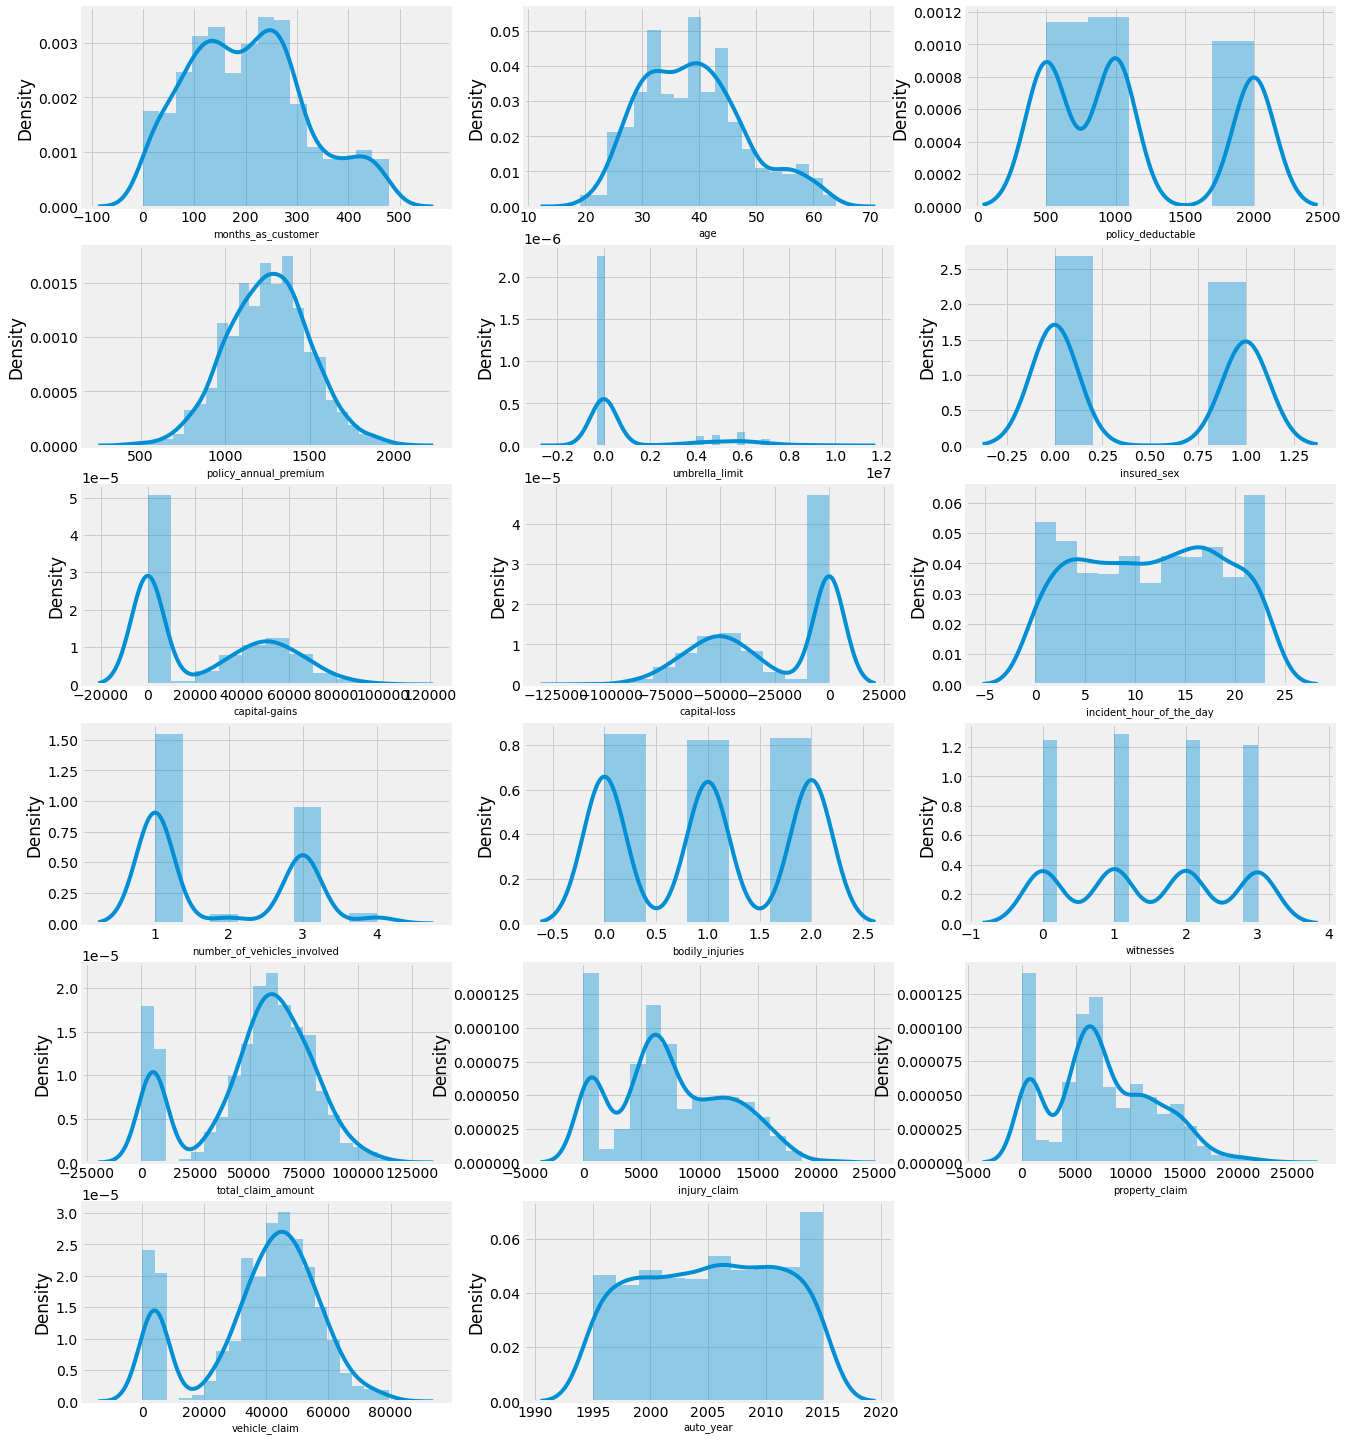

In [116]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,28),facecolor='white')
pltnum=1

for column in df.iloc[:,:17]:
    if pltnum <= 21:
        plt.subplot(7,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [ ]:
#As we can see there is very less outliers in the features.

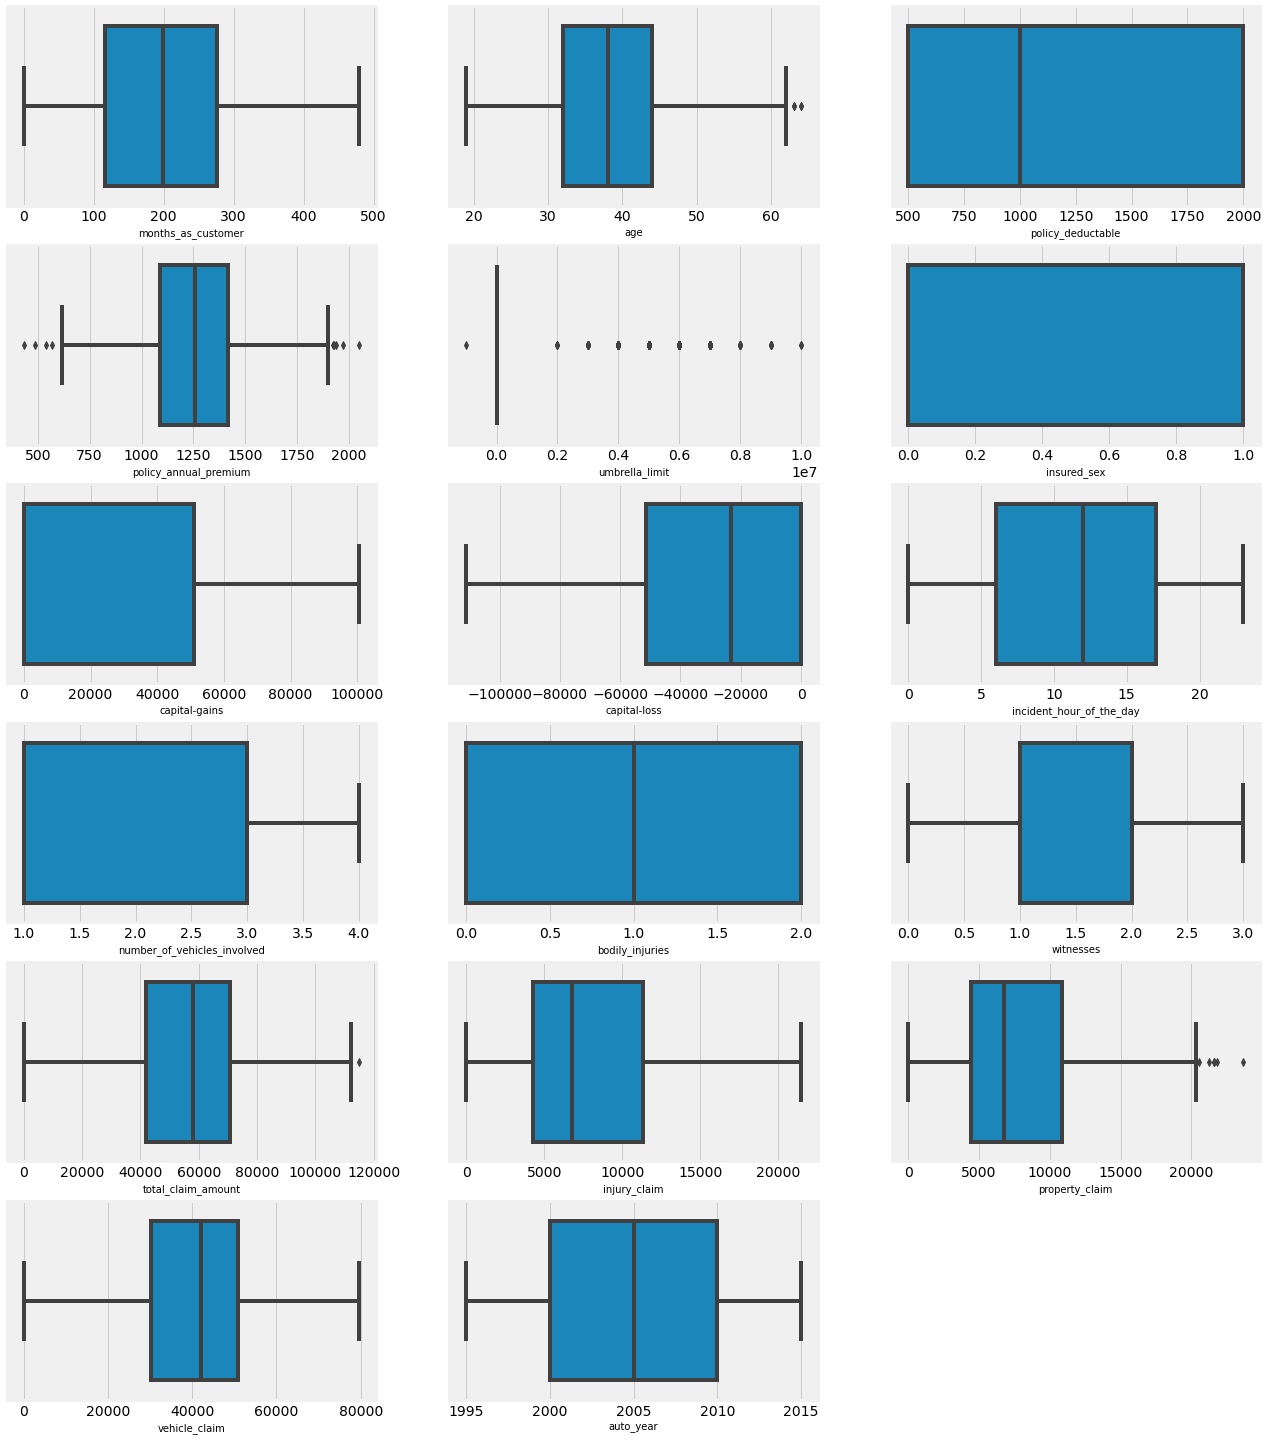

In [117]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,28),facecolor='white')
pltnum=1

for column in df.iloc[:,:17]:
    if pltnum <= 21:
        plt.subplot(7,3,pltnum)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [ ]:
#there is some outliers are available in the some of the features.
#age,policy_annual_premium,umbrella_limit,total_claim_amount,property_claim

In [194]:
#using z score to delete the outliers from the features.
z=np.abs(stats.zscore(df.iloc[:,[1,2,3,11,13]]))
index=np.where(z > 3)[0]

In [195]:
len(index)

3

In [196]:
#dropping the oultiers index
df=df.drop(df.index[index])

In [159]:
#df['umbrella_limit'].value_counts()

In [160]:
#checking the new shape after deleting the outlers
df.shape

(997, 161)

In [161]:
#Data Loss
loss_percentage=(1000-997)/1000*100
print(loss_percentage)

0.3


In [133]:
#checking the skewness and correlation of target with features.
df_corr=df.iloc[:,:18].abs().corr()
df_corr['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.169963
total_claim_amount             0.163031
property_claim                 0.135817
injury_claim                   0.089831
umbrella_limit                 0.058565
witnesses                      0.050441
number_of_vehicles_involved    0.049061
bodily_injuries                0.034747
insured_sex                    0.032687
months_as_customer             0.021945
policy_deductable              0.016419
capital-loss                   0.013092
age                            0.013026
incident_hour_of_the_day       0.005586
auto_year                      0.004957
policy_annual_premium         -0.009196
capital-gains                 -0.019465
Name: fraud_reported, dtype: float64

In [ ]:
#there is no skweness available as the all the features range is between -0.5 to +0.5

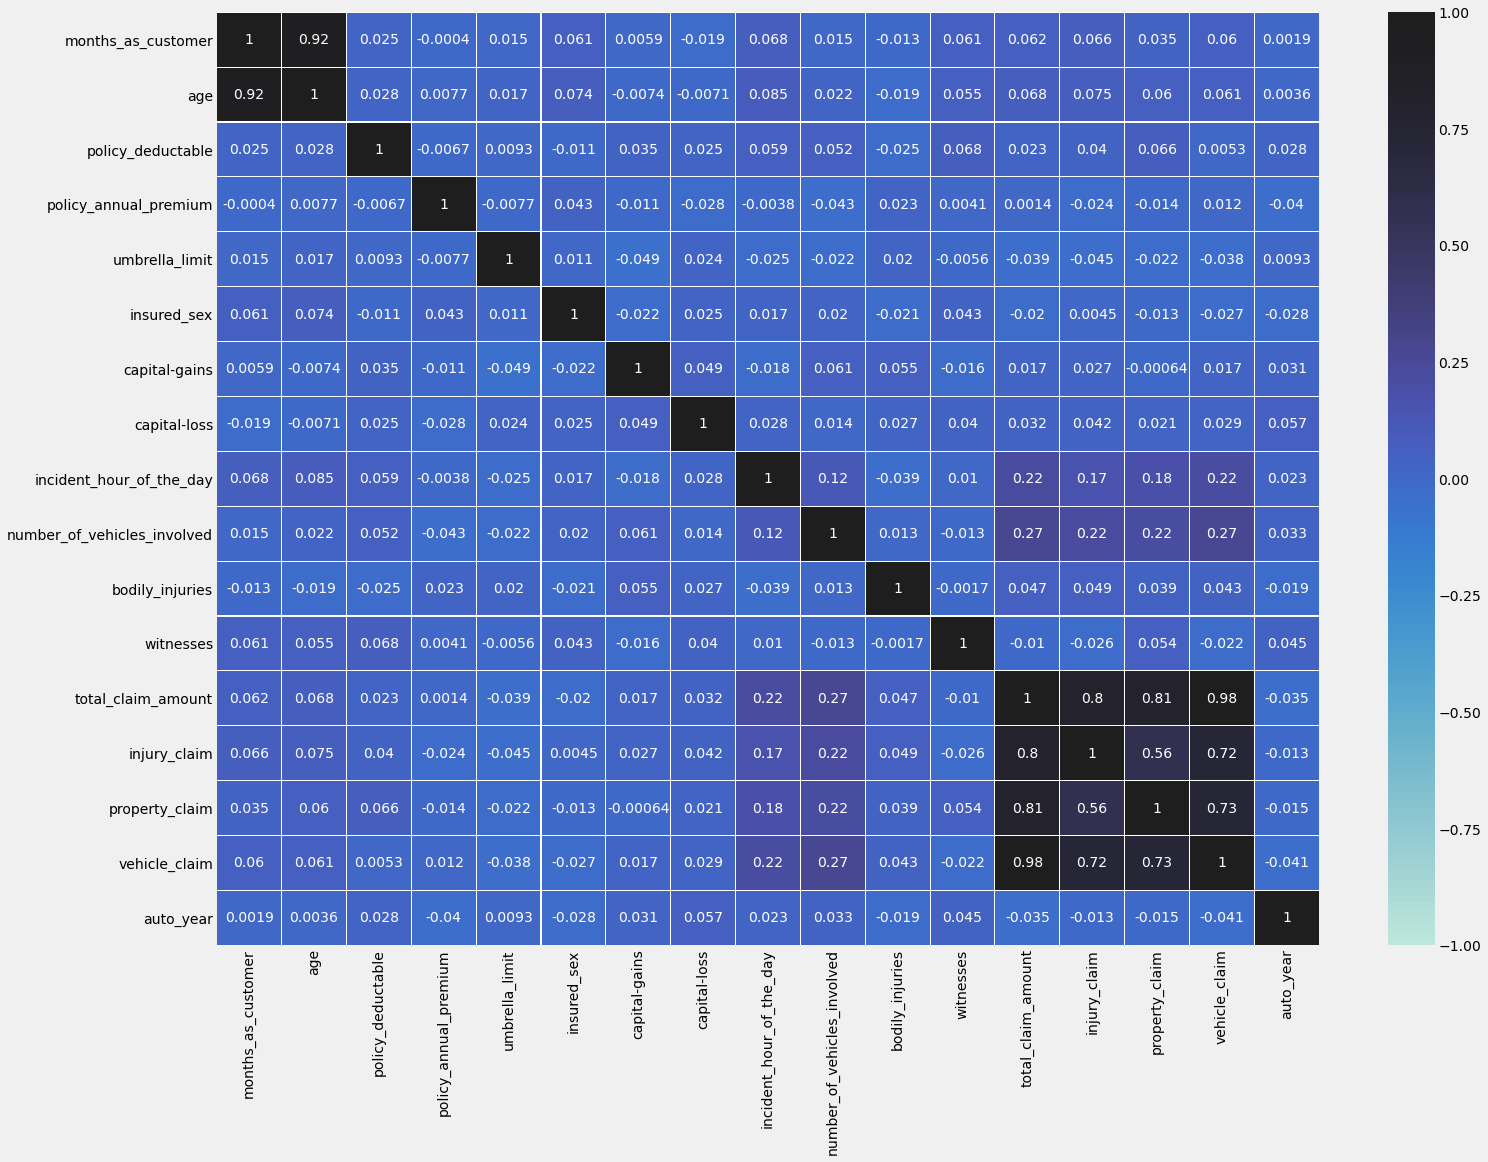

In [162]:
#using the heatmap to check the multicollinearity between features.
corr_matrix=df.iloc[:,:17].abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()


In [ ]:
#there is multicollniarity issue in the many of the features.
#checking the same with the vif

In [197]:
df1=df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16]]
df1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [165]:
#checking vif score beofore standred scalar.
#def CalculateVIF(Data):
#    vif = dict()
#    vif["FeatureColumns"] = Data.columns
#    vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
#    return(pd.DataFrame(vif))

In [171]:
#CalculateVIF(df1)
#there is multicolliniarity issue looks in features.now checking the same with after scalar.

In [198]:
#
features = df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16]]

In [176]:
features.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [199]:
scalar=StandardScaler()
x_new=scalar.fit_transform(features.values)

In [201]:
df1.iloc[:,:]=x_new

In [202]:
df1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,1.075298,0.988190,-0.223668,0.622489,-0.480363,1.009214,0.952850,-0.960348,-0.824233,0.006122,0.465252,0.714488,-0.188350,1.164920,0.749627,-0.182068
1,0.206400,0.331519,1.410010,-0.249466,1.694577,-0.901970,0.952850,-0.528278,-0.824233,-1.214672,-1.336130,-1.808876,-1.363811,-1.373121,-1.825127,0.317076
2,-0.610364,-1.091269,1.410010,0.648395,1.694577,0.356615,0.952850,-0.672301,1.139351,1.226917,1.365942,-0.687128,0.055769,-0.736537,-0.786637,0.317076
3,0.449692,0.222074,1.410010,0.659207,2.129565,0.851443,-1.270261,-0.960348,-0.824233,0.006122,0.465252,0.403145,-0.223224,-0.220220,0.677532,1.481747
4,0.206400,0.550410,-0.223668,1.358508,2.129565,1.464600,-0.685982,1.200001,-0.824233,-1.214672,-0.435439,-1.754647,-1.257137,-1.400077,-1.769995,0.649839


In [142]:
df1=df.iloc[:,:17]

In [203]:
#performing the variance infletion factor to check multicolliniarity between features
vif=pd.DataFrame()
vif['feature name']=df1.columns
vif['vif score']=[variance_inflation_factor(x_new,i) for i in range(x_new.shape[1])]
vif

,feature name,vif score
0,months_as_customer,6.764675
1,age,6.777427
2,policy_deductable,1.022561
3,policy_annual_premium,1.008763
4,umbrella_limit,1.007209
5,capital-gains,1.016294
6,capital-loss,1.013159
7,incident_hour_of_the_day,1.069110
8,number_of_vehicles_involved,1.096100
9,bodily_injuries,1.011337


In [204]:
#dropping the column age and vehicle_claim which haing multicolliniarity issue.
df1=df1.drop(columns=['age','vehicle_claim','total_claim_amount'],axis=1)

In [205]:
df1.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,auto_year
0,1.075298,-0.223668,0.622489,-0.480363,1.009214,0.952850,-0.960348,-0.824233,0.006122,0.465252,-0.188350,1.164920,-0.182068
1,0.206400,1.410010,-0.249466,1.694577,-0.901970,0.952850,-0.528278,-0.824233,-1.214672,-1.336130,-1.363811,-1.373121,0.317076
2,-0.610364,1.410010,0.648395,1.694577,0.356615,0.952850,-0.672301,1.139351,1.226917,1.365942,0.055769,-0.736537,0.317076
3,0.449692,1.410010,0.659207,2.129565,0.851443,-1.270261,-0.960348,-0.824233,0.006122,0.465252,-0.223224,-0.220220,1.481747
4,0.206400,-0.223668,1.358508,2.129565,1.464600,-0.685982,1.200001,-0.824233,-1.214672,-0.435439,-1.257137,-1.400077,0.649839


In [206]:
features = df1

In [207]:
scalar=StandardScaler()
x_new=scalar.fit_transform(features.values)

In [208]:
#performing the variance infletion factor to check multicolliniarity between features
vif=pd.DataFrame()
vif['feature name']=df1.columns
vif['vif score']=[variance_inflation_factor(x_new,i) for i in range(x_new.shape[1])]
vif

,feature name,vif score
0,months_as_customer,1.013459
1,policy_deductable,1.015524
2,policy_annual_premium,1.005052
3,umbrella_limit,1.007041
4,capital-gains,1.015215
5,capital-loss,1.012342
6,incident_hour_of_the_day,1.057055
7,number_of_vehicles_involved,1.081270
8,bodily_injuries,1.011036
9,witnesses,1.020383


In [209]:
df[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved',
    'bodily_injuries','witnesses','injury_claim','property_claim','auto_year']]=x_new

In [210]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1.075298,48,-0.223668,0.622489,-0.480363,1,1.009214,0.952850,-0.960348,-0.824233,...,0,0,0,0,0,0,0,0,0,0
1,0.206400,42,1.410010,-0.249466,1.694577,1,-0.901970,0.952850,-0.528278,-0.824233,...,0,0,0,0,0,0,0,0,0,0
2,-0.610364,29,1.410010,0.648395,1.694577,0,0.356615,0.952850,-0.672301,1.139351,...,0,1,0,0,0,0,0,0,0,0
3,0.449692,41,1.410010,0.659207,2.129565,0,0.851443,-1.270261,-0.960348,-0.824233,...,0,0,0,0,0,1,0,0,0,0
4,0.206400,44,-0.223668,1.358508,2.129565,1,1.464600,-0.685982,1.200001,-0.824233,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#there is no multicolliniarty found between the features as all the vif score is below 5.

In [211]:
#seprating the x features and target from the dataset.
x=df.drop(columns='fraud_reported')
y=df['fraud_reported']

In [212]:
#Checking the upsampling and downsampling(class imbalanced problem) for the target columns
y.value_counts()

0    751
1    246
Name: fraud_reported, dtype: int64

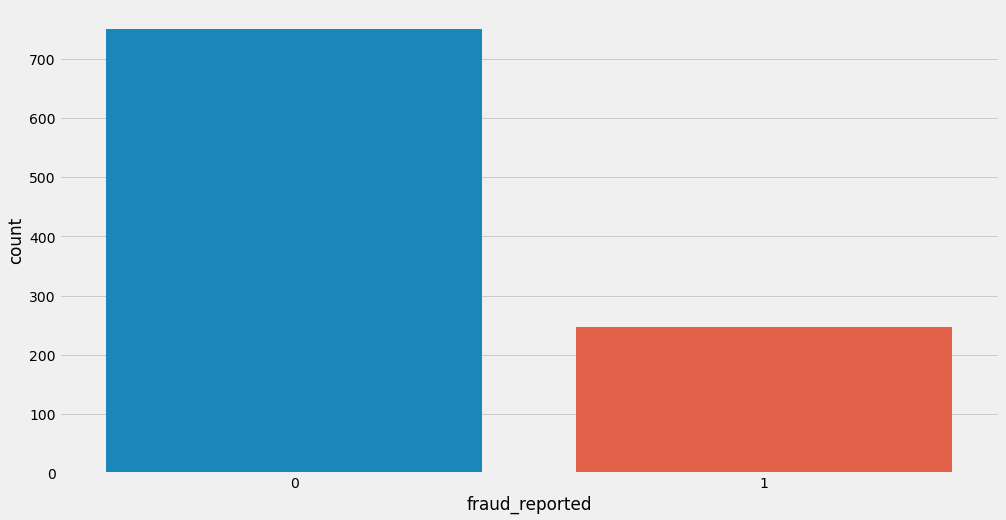

In [213]:
#Plotting the count plot to check label data
sns.countplot(x='fraud_reported',data=df)
plt.show()

In [ ]:
#here we can see the issue of class imbalanced problem as 0 has 751 count and 1 has only 246 count.

In [214]:
#handling class imbalanced problem by oversampling the minority class using SMOTE:
from imblearn.over_sampling import SMOTE

In [215]:
SM=SMOTE()
x_fit,y_fit=SM.fit_resample(x,y)

In [216]:
#new the issue of class imbalanced problem has been solved.
y_fit.value_counts()

1    751
0    751
Name: fraud_reported, dtype: int64

In [217]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=i)
    dt=LogisticRegression()
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc_s=accuracy_score(y_test,y_pred)
    if acc_s > maxAcc:
        maxAcc=acc_s
        maxRs=i
        
print(f"Best Accuracy is : {maxAcc* 100:.2f}%")
print("The Best Random State is :",maxRs)

Best Accuracy is : 91.49%
The Best Random State is : 97


In [218]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.25,random_state=97)

In [219]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)

print('\n==========Outputs of Logistics Reggression===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predlr)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predlr,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predlr))


==========Outputs of Logistics Reggression===========

==========Accuracy Score===========
Accuracy Score is : 91.49%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       192
           1       0.93      0.90      0.91       184

    accuracy                           0.91       376
   macro avg       0.92      0.91      0.91       376
weighted avg       0.92      0.91      0.91       376
 

=========Confusion Matrix============
[[179  13]
 [ 19 165]]


In [220]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 84.57%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       192
           1       0.86      0.82      0.84       184

    accuracy                           0.85       376
   macro avg       0.85      0.85      0.85       376
weighted avg       0.85      0.85      0.85       376
 

=========Confusion Matrix============
[[167  25]
 [ 33 151]]


In [221]:
#Using the AdaBoostClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_predabc=abc.predict(x_test)

print('\n==========Outputs of ADA Boost===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predabc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predabc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predabc))


==========Outputs of ADA Boost===========

==========Accuracy Score===========
Accuracy Score is : 91.49%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       192
           1       0.93      0.90      0.91       184

    accuracy                           0.91       376
   macro avg       0.92      0.91      0.91       376
weighted avg       0.92      0.91      0.91       376
 

=========Confusion Matrix============
[[179  13]
 [ 19 165]]


In [223]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 92.02%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       192
           1       0.92      0.91      0.92       184

    accuracy                           0.92       376
   macro avg       0.92      0.92      0.92       376
weighted avg       0.92      0.92      0.92       376
 

=========Confusion Matrix============
[[178  14]
 [ 16 168]]


In [224]:
#Using the KNeighborsClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)

print('\n==========Outputs of KNeighborsClassifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predknn)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predknn,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predknn))


==========Outputs of KNeighborsClassifier===========

==========Accuracy Score===========
Accuracy Score is : 67.82%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       192
           1       0.65      0.76      0.70       184

    accuracy                           0.68       376
   macro avg       0.68      0.68      0.68       376
weighted avg       0.68      0.68      0.68       376
 

=========Confusion Matrix============
[[116  76]
 [ 45 139]]


In [225]:
print('\n==========Cross Validation Score of Logistices Classifier===========')
cvs_lr=cross_val_score(lr,x_fit,y_fit,cv=5)
print(f"Cross validation for the Logistices Classifier is: {cvs_lr.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Classifier===========')
cvs_rfc=cross_val_score(rfc,x_fit,y_fit,cv=5)
print(f"Cross validation for the Random Forest Classifier is: {cvs_rfc.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of Decision Tree====================')
cvs_dt=cross_val_score(dt,x_fit,y_fit,cv=5)
print(f"Cross validation for the Decision Tree is: {cvs_dt.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of AdaBoost Classifier==============')
cvs_abc=cross_val_score(abc,x_fit,y_fit,cv=5)
print(f"Cross validation for the AdaBoost Classifier is: {cvs_abc.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of KNN========================')
cvs_knn=cross_val_score(knn,x_fit,y_fit,cv=5)
print(f"Cross validation for the KNN Classifier is: {cvs_knn.mean()*100:.2f}%\n")


==========Cross Validation Score of Logistices Classifier===========
Cross validation for the Logistices Classifier is: 74.38%


==========Cross Validation Score of Random Forest Classifier===========
Cross validation for the Random Forest Classifier is: 85.30%


=============Cross Validation Score of Decision Tree====================
Cross validation for the Decision Tree is: 82.50%


=============Cross Validation Score of AdaBoost Classifier==============
Cross validation for the AdaBoost Classifier is: 85.04%


===================Cross Validation Score of KNN========================
Cross validation for the KNN Classifier is: 68.18%



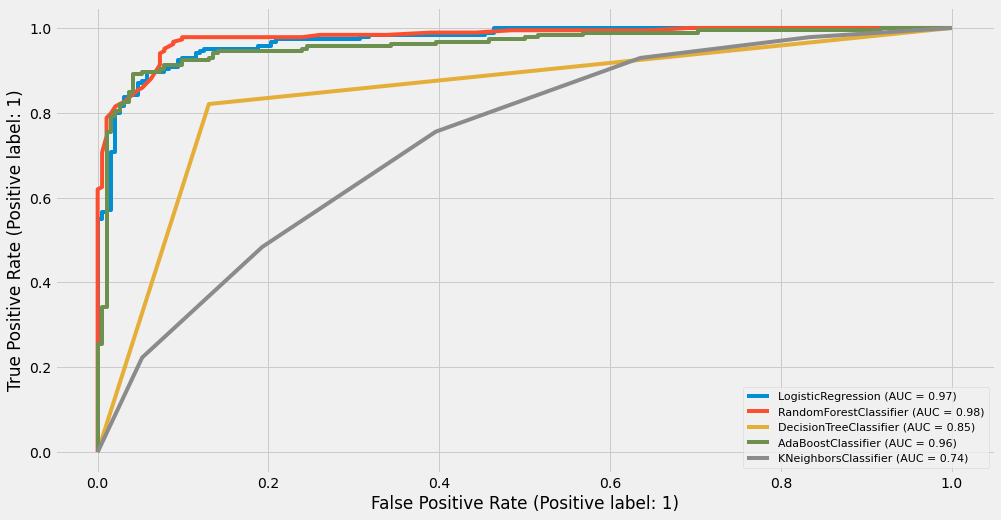

In [226]:
#using the roc_auc_curve 
dist=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=dist.ax_)#abc svc, 
plot_roc_curve(dt,x_test,y_test,ax=dist.ax_)
plot_roc_curve(abc,x_test,y_test,ax=dist.ax_)
plot_roc_curve(knn,x_test,y_test,ax=dist.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [ ]:
#we select the Random Forest Regressor after comaparing all the models accuracy with the cross validation score.
#LR: Accuracy:91.49   cross validation score:74.38  Diffrence:17.11
#DT: Accuracy:84.57   cross validation score:82.50  Diffrence:2.07
#ADA: Accuracy:91.49   cross validation score:85.04  Diffrence:6.45
#RFC: Accuracy:92.02   cross validation score:85.30  Diffrence:6.72
#KNN: Accuracy:67.82   cross validation score:68.18  Diffrence:-0.36

#As we can see the decision tree has least diffrence so selecting the Decision tree for the hyper parameter tuning.

In [227]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'criterion':['gini','entropy'],
           'max_depth':[10,12,15,20],
           'min_samples_split':[2,3,5,7],
           'min_samples_leaf':[2,4,6,8]}

In [228]:
gridcv=GridSearchCV(dt,param_grid=best_param)

In [229]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 3, 5, 7]})

In [230]:
gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [246]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=8,min_samples_split=2)
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)

print('\n==========Outputs of DT===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_preddt)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_preddt,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_preddt))


==========Outputs of DT===========

==========Accuracy Score===========
Accuracy Score is : 88.56%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       192
           1       0.91      0.85      0.88       184

    accuracy                           0.89       376
   macro avg       0.89      0.88      0.89       376
weighted avg       0.89      0.89      0.89       376
 

=========Confusion Matrix============
[[177  15]
 [ 28 156]]


In [ ]:
#the Hyper parameter tuning has incressed the accurcy so use randomforest with hyper parameter tuning.
#Saving the random forerst claasifier as the final model.

In [247]:
#Saving the model
import joblib
joblib.dump(dt,'Insurance_Claims_Model.pkl')

['Insurance_Claims_Model.pkl']

In [ ]:
#This will complete the model building.